In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import load_img, img_to_array
from keras import models
from keras import layers
from sklearn.metrics import confusion_matrix, f1_score
import tensorflow as tf
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, GlobalAveragePooling2D
from keras.models import Sequential
from keras.applications import VGG16
from keras.utils.vis_utils import plot_model
import pickle
from tensorflow.keras.applications.resnet50 import ResNet50

In [3]:
path = 'drive/MyDrive/'

Text(0.5, 1.0, 'No Tumor')

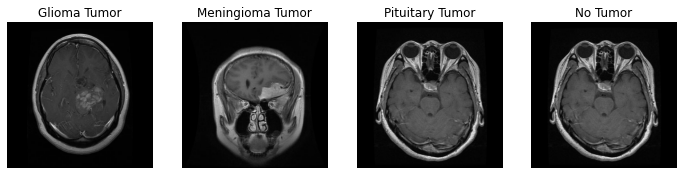

In [4]:
fig, ax = plt.subplots(nrows = 1, ncols=4,figsize=(12,12))
ax_1 = ax[0]
img1 = load_img(path + 'data/Training/glioma_tumor/gg (1).jpg', target_size=(256,256))
ax_1.imshow(img1)
ax_1.axis('off')
ax_1.set_title('Glioma Tumor')


ax_2 = ax[1]
img2 = load_img(path +'data/Training/meningioma_tumor/m (10).jpg', target_size=(256,256))
ax_2.imshow(img2)
ax_2.axis('off')
ax_2.set_title('Meningioma Tumor')

ax_3 = ax[2]
img3 = load_img(path +'data/Training/pituitary_tumor/p (1).jpg', target_size=(256,256))
ax_3.imshow(img3)
ax_3.axis('off')
ax_3.set_title('Pituitary Tumor')

ax_4 = ax[3]
img4 = load_img(path +'data/Training/no_tumor/1.jpg', target_size=(256,256))
ax_4.imshow(img3)
ax_4.axis('off')
ax_4.set_title('No Tumor')

In [5]:
df = pd.DataFrame()
df['folder'] = ['Testing','Testing', 'Testing','Testing',
                    'Training','Training', 'Training','Training']
df['images'] = [101, 116, 75, 106,
                    827, 823, 828, 396]
df['class'] = ['Glioma','Meningioma', 'Pituitaty', 'No Tumor',
                    'Glioma','Meningioma', 'Pituitaty', 'No Tumor']

df

,folder,images,class
0,Testing,101,Glioma
1,Testing,116,Meningioma
2,Testing,75,Pituitaty
3,Testing,106,No Tumor
4,Training,827,Glioma
5,Training,823,Meningioma
6,Training,828,Pituitaty
7,Training,396,No Tumor


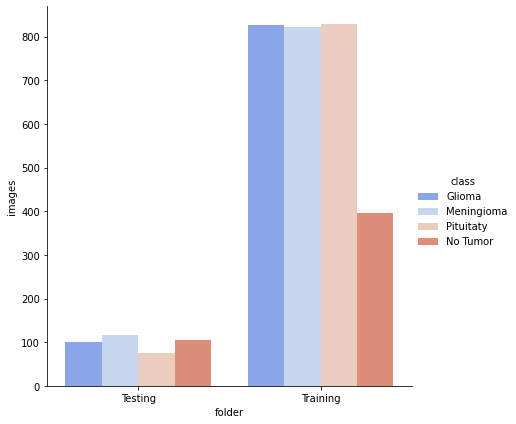

In [6]:
sns.catplot(
    data=df, kind="bar",
    x="folder", y="images", hue="class",
    palette="coolwarm", height=6
)

In [7]:
train = ImageDataGenerator().flow_from_directory(
        directory = path + 'data/Training',
        class_mode = 'categorical',
        target_size = (256, 256),
        batch_size = 2870
) 


Found 2870 images belonging to 4 classes.


In [8]:
test = ImageDataGenerator().flow_from_directory(
        directory = path + 'data/Testing',
        class_mode = 'categorical',
        target_size = (256, 256),
        batch_size = 394) 


Found 394 images belonging to 4 classes.


In [9]:
test_images, test_labels = next(test)

In [10]:
train_images, train_labels = next(train)

In [11]:
train_labels[0]

array([0., 1., 0., 0.], dtype=float32)

In [12]:
train_images.shape

(2870, 256, 256, 3)

In [13]:
test_images.shape

(394, 256, 256, 3)

In [14]:
test_labels = np.reshape(test_labels, (len(test_labels),4)).astype(int)
train_labels = np.reshape(train_labels, (len(train_labels),4)).astype(int)

In [15]:
train_labels[0]

array([0, 1, 0, 0])

### Function to plot confusion matrix

In [16]:
def plot_confusion_matrix(test, pred, title = 'Confusion Matrix'):
  labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
  act_labels = []
  pred_labels = []
  for i in range(len(pred)):
    act_labels.append(labels[list(test[i]).index(1.0)])
    pred_labels.append(labels[pred[i].argmax()])
  cm = confusion_matrix(act_labels, pred_labels)
  cm_df = pd.DataFrame(cm, index = labels,  columns = labels)
  plt.figure(figsize=(10,8))
  sns.heatmap(cm_df, annot=True, cmap="Blues")
  plt.title(title)
  plt.ylabel('Actual Values')
  plt.xlabel('Predicted Values')
  plt.show()




#### Creating Validation Set

In [18]:
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.05)

In [19]:
x_val.shape

(144, 256, 256, 3)

In [20]:
x_train.shape

(2726, 256, 256, 3)

## CNN

In [27]:
cnn = Sequential()
cnn.add(Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256,  3)))
cnn.add(MaxPooling2D((2, 2)))

cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D((2, 2)))

cnn.add(Conv2D(16, (3, 3), activation='relu'))
cnn.add(MaxPooling2D((2, 2)))

cnn.add(Flatten())
cnn.add(Dense(32, activation='relu'))
cnn.add(Dense(16, activation='relu'))
cnn.add(Dense(4, activation='softmax'))

cnn.compile(loss='categorical_crossentropy',
              optimizer = "Adam",
              metrics=['accuracy'])

In [28]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)      

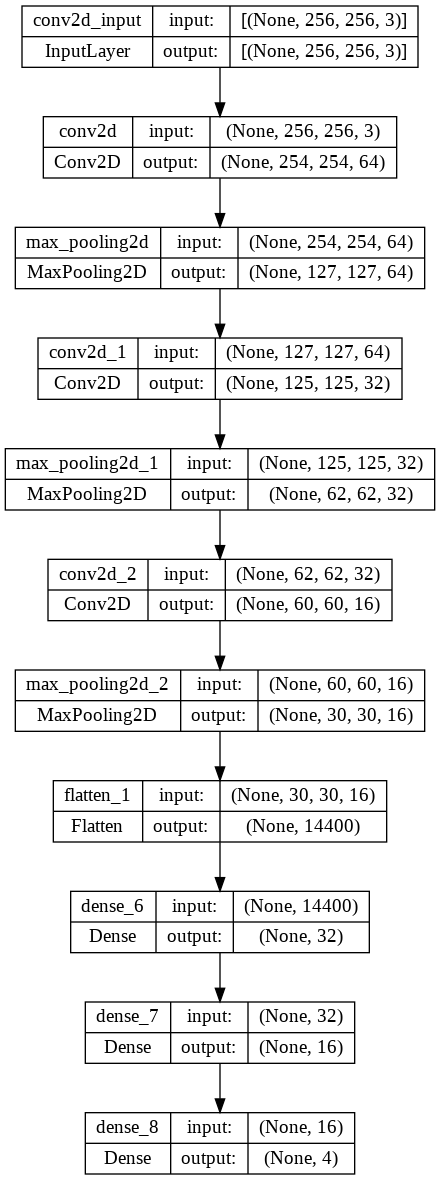

In [35]:
plot_model(cnn, to_file='model.png',show_shapes = True)

In [30]:
cnn1 = cnn.fit(x_train, y_train,
              epochs = 30,
              validation_data=(x_val, y_val),
              workers = -1)

Epoch 1/30
86/86 [==============================] - 61s 702ms/step - loss: 2.5866 - accuracy: 0.5363 - val_loss: 0.8116 - val_accuracy: 0.6319
Epoch 2/30
86/86 [==============================] - 60s 696ms/step - loss: 0.5692 - accuracy: 0.7740 - val_loss: 0.5358 - val_accuracy: 0.7569
Epoch 3/30
86/86 [==============================] - 61s 705ms/step - loss: 0.3261 - accuracy: 0.8804 - val_loss: 0.5486 - val_accuracy: 0.8681
Epoch 4/30
86/86 [==============================] - 60s 703ms/step - loss: 0.1938 - accuracy: 0.9303 - val_loss: 0.7959 - val_accuracy: 0.8125
Epoch 5/30
86/86 [==============================] - 60s 699ms/step - loss: 0.1573 - accuracy: 0.9417 - val_loss: 0.7645 - val_accuracy: 0.8333
Epoch 6/30
86/86 [==============================] - 60s 696ms/step - loss: 0.0891 - accuracy: 0.9707 - val_loss: 0.5804 - val_accuracy: 0.8472
Epoch 7/30
86/86 [==============================] - 60s 693ms/step - loss: 0.0489 - accuracy: 0.9839 - val_loss: 0.7915 - val_accuracy: 0.8750

In [31]:
results_train = cnn.evaluate(x_train, y_train)
results_test = cnn.evaluate(test_images, test_labels)
print('Train: ',results_train)
print('Test: ',results_test)

13/13 [==============================] - 1s 84ms/step - loss: 8.6533 - accuracy: 0.7234
Train:  [5.3884024964645505e-05, 1.0]
Test:  [8.653284072875977, 0.7233502268791199]


In [32]:
preds = cnn.predict(test_images)

13/13 [==============================] - 1s 75ms/step


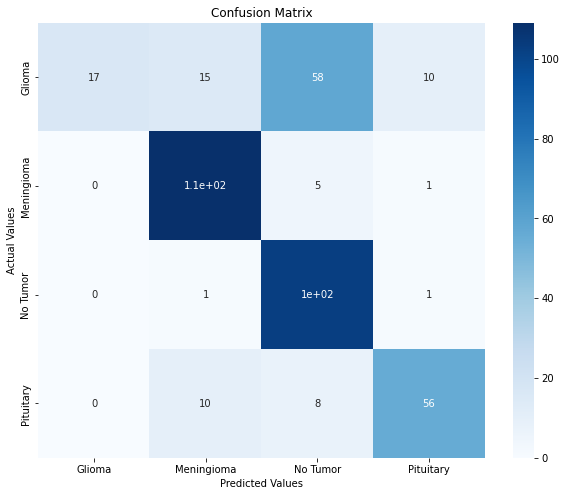

In [33]:
plot_confusion_matrix(test_labels, preds)

In [34]:
# Saving the model
pick_insert = open('drive/My Drive/data/cnn.pkl','wb')
pickle.dump(cnn, pick_insert)
pick_insert.close()

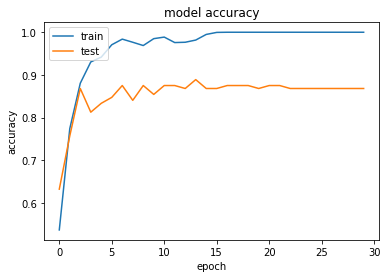

In [36]:
# summarize history for accuracy
plt.plot(cnn1.history['accuracy'])
plt.plot(cnn1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


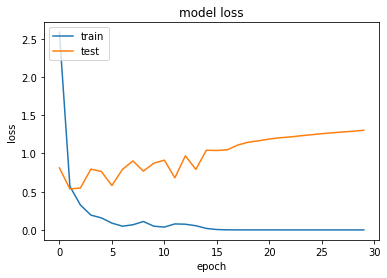

In [37]:
# summarize history for loss
plt.plot(cnn1.history['loss'])
plt.plot(cnn1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Another CNN

In [ ]:
model = Sequential()
model.add(Conv2D(128, (3,3), activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(16, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(32, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 128)    0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 127, 127, 128)     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 64)       

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
hist = model.fit(x_train,
                    y_train,
                    epochs=20,
                    validation_data=(x_val, y_val),
                      workers = -1)

Epoch 1/20
86/86 [==============================] - 136s 2s/step - loss: 0.7368 - accuracy: 0.7219 - val_loss: 0.7520 - val_accuracy: 0.7083
Epoch 2/20
86/86 [==============================] - 137s 2s/step - loss: 0.6759 - accuracy: 0.7428 - val_loss: 0.6486 - val_accuracy: 0.7431
Epoch 3/20
86/86 [==============================] - 137s 2s/step - loss: 0.6299 - accuracy: 0.7762 - val_loss: 0.6275 - val_accuracy: 0.7569
Epoch 4/20
86/86 [==============================] - 137s 2s/step - loss: 0.6139 - accuracy: 0.7902 - val_loss: 0.6279 - val_accuracy: 0.7917
Epoch 5/20
86/86 [==============================] - 136s 2s/step - loss: 0.5981 - accuracy: 0.7876 - val_loss: 0.5913 - val_accuracy: 0.8056
Epoch 6/20
86/86 [==============================] - 136s 2s/step - loss: 0.5548 - accuracy: 0.8037 - val_loss: 0.5470 - val_accuracy: 0.8194
Epoch 7/20
86/86 [==============================] - 136s 2s/step - loss: 0.5314 - accuracy: 0.8133 - val_loss: 0.5658 - val_accuracy: 0.8194
Epoch 8/20
86

In [ ]:
results_train =  model.evaluate(x_train, y_train)
results_test = model.evaluate(test_images, test_labels)
print('Train: ',results_train)
print('Test: ',results_test)

13/13 [==============================] - 2s 175ms/step - loss: 1.6520 - accuracy: 0.4289
Train:  [0.2663177251815796, 0.9057226777076721]
Test:  [1.6519827842712402, 0.4289340078830719]


13/13 [==============================] - 2s 173ms/step


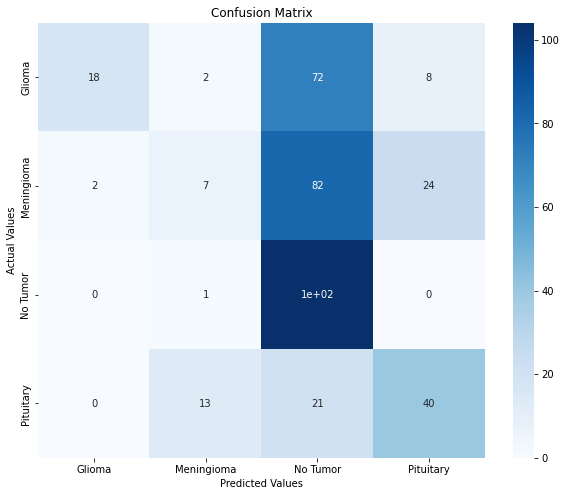

In [ ]:
preds = model.predict(test_images)
plot_confusion_matrix(test_labels, preds)

## Trying pre-trained Models

## Trying VGG16

In [ ]:
mod = VGG16(weights='imagenet',include_top=False, input_shape = (256, 256,  3))
model = Sequential()
model.add(mod)

model.add(GlobalAveragePooling2D())

model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu')) 
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu')) 

model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(Dense(4,activation='softmax'))



In [ ]:
mod.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 global_average_pooling2d_2   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                      

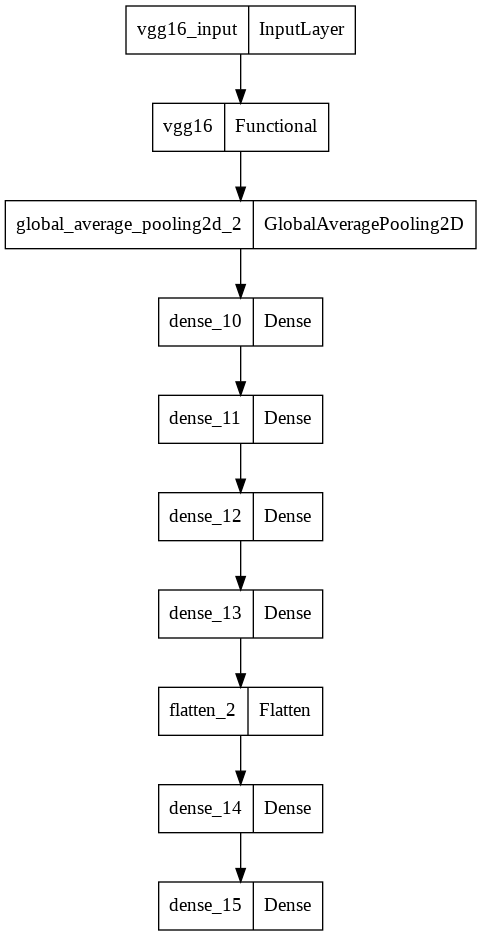

In [ ]:
plot_model(model)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = "Adam",
              metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train,
                    y_train,
                    epochs=20,
                    validation_data=(x_val, y_val),
                      workers = -1)

Epoch 1/20
86/86 [==============================] - 672s 8s/step - loss: 2.5756 - accuracy: 0.2880 - val_loss: 1.2113 - val_accuracy: 0.2847
Epoch 2/20
86/86 [==============================] - 666s 8s/step - loss: 1.1651 - accuracy: 0.4237 - val_loss: 1.1045 - val_accuracy: 0.5139
Epoch 3/20
86/86 [==============================] - 665s 8s/step - loss: 1.1133 - accuracy: 0.5158 - val_loss: 1.0027 - val_accuracy: 0.6111
Epoch 4/20
86/86 [==============================] - 664s 8s/step - loss: 0.9687 - accuracy: 0.5965 - val_loss: 0.8757 - val_accuracy: 0.6806
Epoch 5/20
86/86 [==============================] - 666s 8s/step - loss: 0.8438 - accuracy: 0.6592 - val_loss: 0.7843 - val_accuracy: 0.6944
Epoch 6/20
86/86 [==============================] - 665s 8s/step - loss: 0.7275 - accuracy: 0.7102 - val_loss: 0.6314 - val_accuracy: 0.7708
Epoch 7/20
86/86 [==============================] - 664s 8s/step - loss: 0.6440 - accuracy: 0.7392 - val_loss: 0.5682 - val_accuracy: 0.7708
Epoch 8/20
86

In [ ]:
results_train =  model.evaluate(x_train, y_train)
results_test = model.evaluate(test_images, test_labels)
print('Train: ',results_train)
print('Test: ',results_test)

13/13 [==============================] - 15s 1s/step - loss: 2.4212 - accuracy: 0.4416
Train:  [0.32396629452705383, 0.8738077878952026]
Test:  [2.4212441444396973, 0.44162437319755554]


13/13 [==============================] - 15s 1s/step


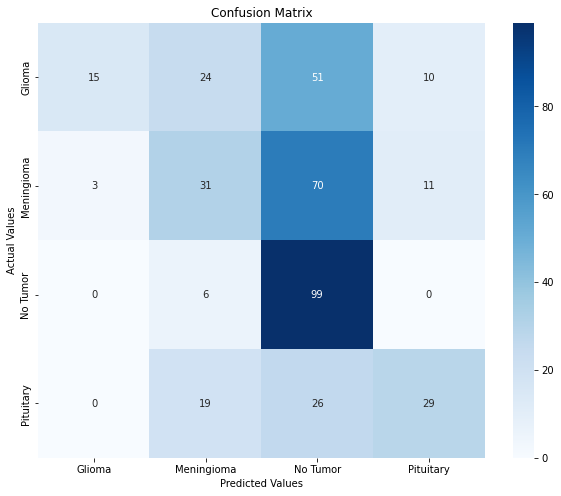

In [ ]:
preds = model.predict(test_images)
plot_confusion_matrix(test_labels, preds)

In [ ]:
pick_insert = open('drive/My Drive/data/vgg.pkl','wb')
pickle.dump(model, pick_insert)
pick_insert.close()

In [ ]:
pick_read = open('drive/My Drive/data/vgg.pkl','rb')
data = pickle.load(pick_read)
pick_read.close()

## Resnet Model

In [22]:
resnet = ResNet50(weights = 'imagenet', include_top = False, input_shape = (256, 256,  3))
resnet.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [23]:
model = Sequential()
model.add(resnet)

model.add(GlobalAveragePooling2D())

model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu')) 
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu')) 

model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer = "Adam",
              metrics=['accuracy'])
hist = model.fit(x_train,
                    y_train,
                    epochs=20,
                    validation_data=(x_val, y_val),
                      workers = -1)

Epoch 1/20
86/86 [==============================] - 284s 3s/step - loss: 0.6469 - accuracy: 0.7689 - val_loss: 157.0153 - val_accuracy: 0.1181
Epoch 2/20
86/86 [==============================] - 274s 3s/step - loss: 0.4092 - accuracy: 0.8434 - val_loss: 2.2117 - val_accuracy: 0.3194
Epoch 3/20
86/86 [==============================] - 274s 3s/step - loss: 0.3029 - accuracy: 0.8947 - val_loss: 8.6475 - val_accuracy: 0.4722
Epoch 4/20
86/86 [==============================] - 273s 3s/step - loss: 0.2978 - accuracy: 0.9013 - val_loss: 2.2669 - val_accuracy: 0.2361
Epoch 5/20
86/86 [==============================] - 273s 3s/step - loss: 0.2221 - accuracy: 0.9226 - val_loss: 3.9022 - val_accuracy: 0.2778
Epoch 6/20
86/86 [==============================] - 272s 3s/step - loss: 0.1567 - accuracy: 0.9435 - val_loss: 0.9754 - val_accuracy: 0.8125
Epoch 7/20
86/86 [==============================] - 272s 3s/step - loss: 0.2460 - accuracy: 0.9204 - val_loss: 1.4334 - val_accuracy: 0.6736
Epoch 8/20


In [25]:
results_train =  model.evaluate(x_train, y_train)
results_test = model.evaluate(test_images, test_labels)
print('Train: ',results_train)
print('Test: ',results_test)

13/13 [==============================] - 7s 512ms/step - loss: 4.0610 - accuracy: 0.5812
Train:  [0.7025466561317444, 0.8154805302619934]
Test:  [4.0609540939331055, 0.5812183022499084]


13/13 [==============================] - 7s 500ms/step


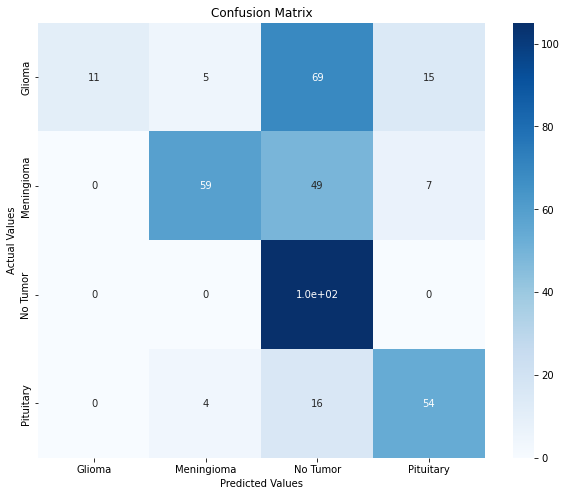

In [26]:
preds = model.predict(test_images)
plot_confusion_matrix(test_labels, preds)